In [1]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# df = pd.read_csv('https://www.asx.com.au/asx/research/ASXListedCompanies.csv',skiprows=1)


df = pd.read_csv('/Users/joezhou/Downloads/Mentum Assignment Data/Customer-churn-records.csv',sep=",")



In [20]:
# Part 2 
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 

# df_stat = df.describe().T
# print(df_stat)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

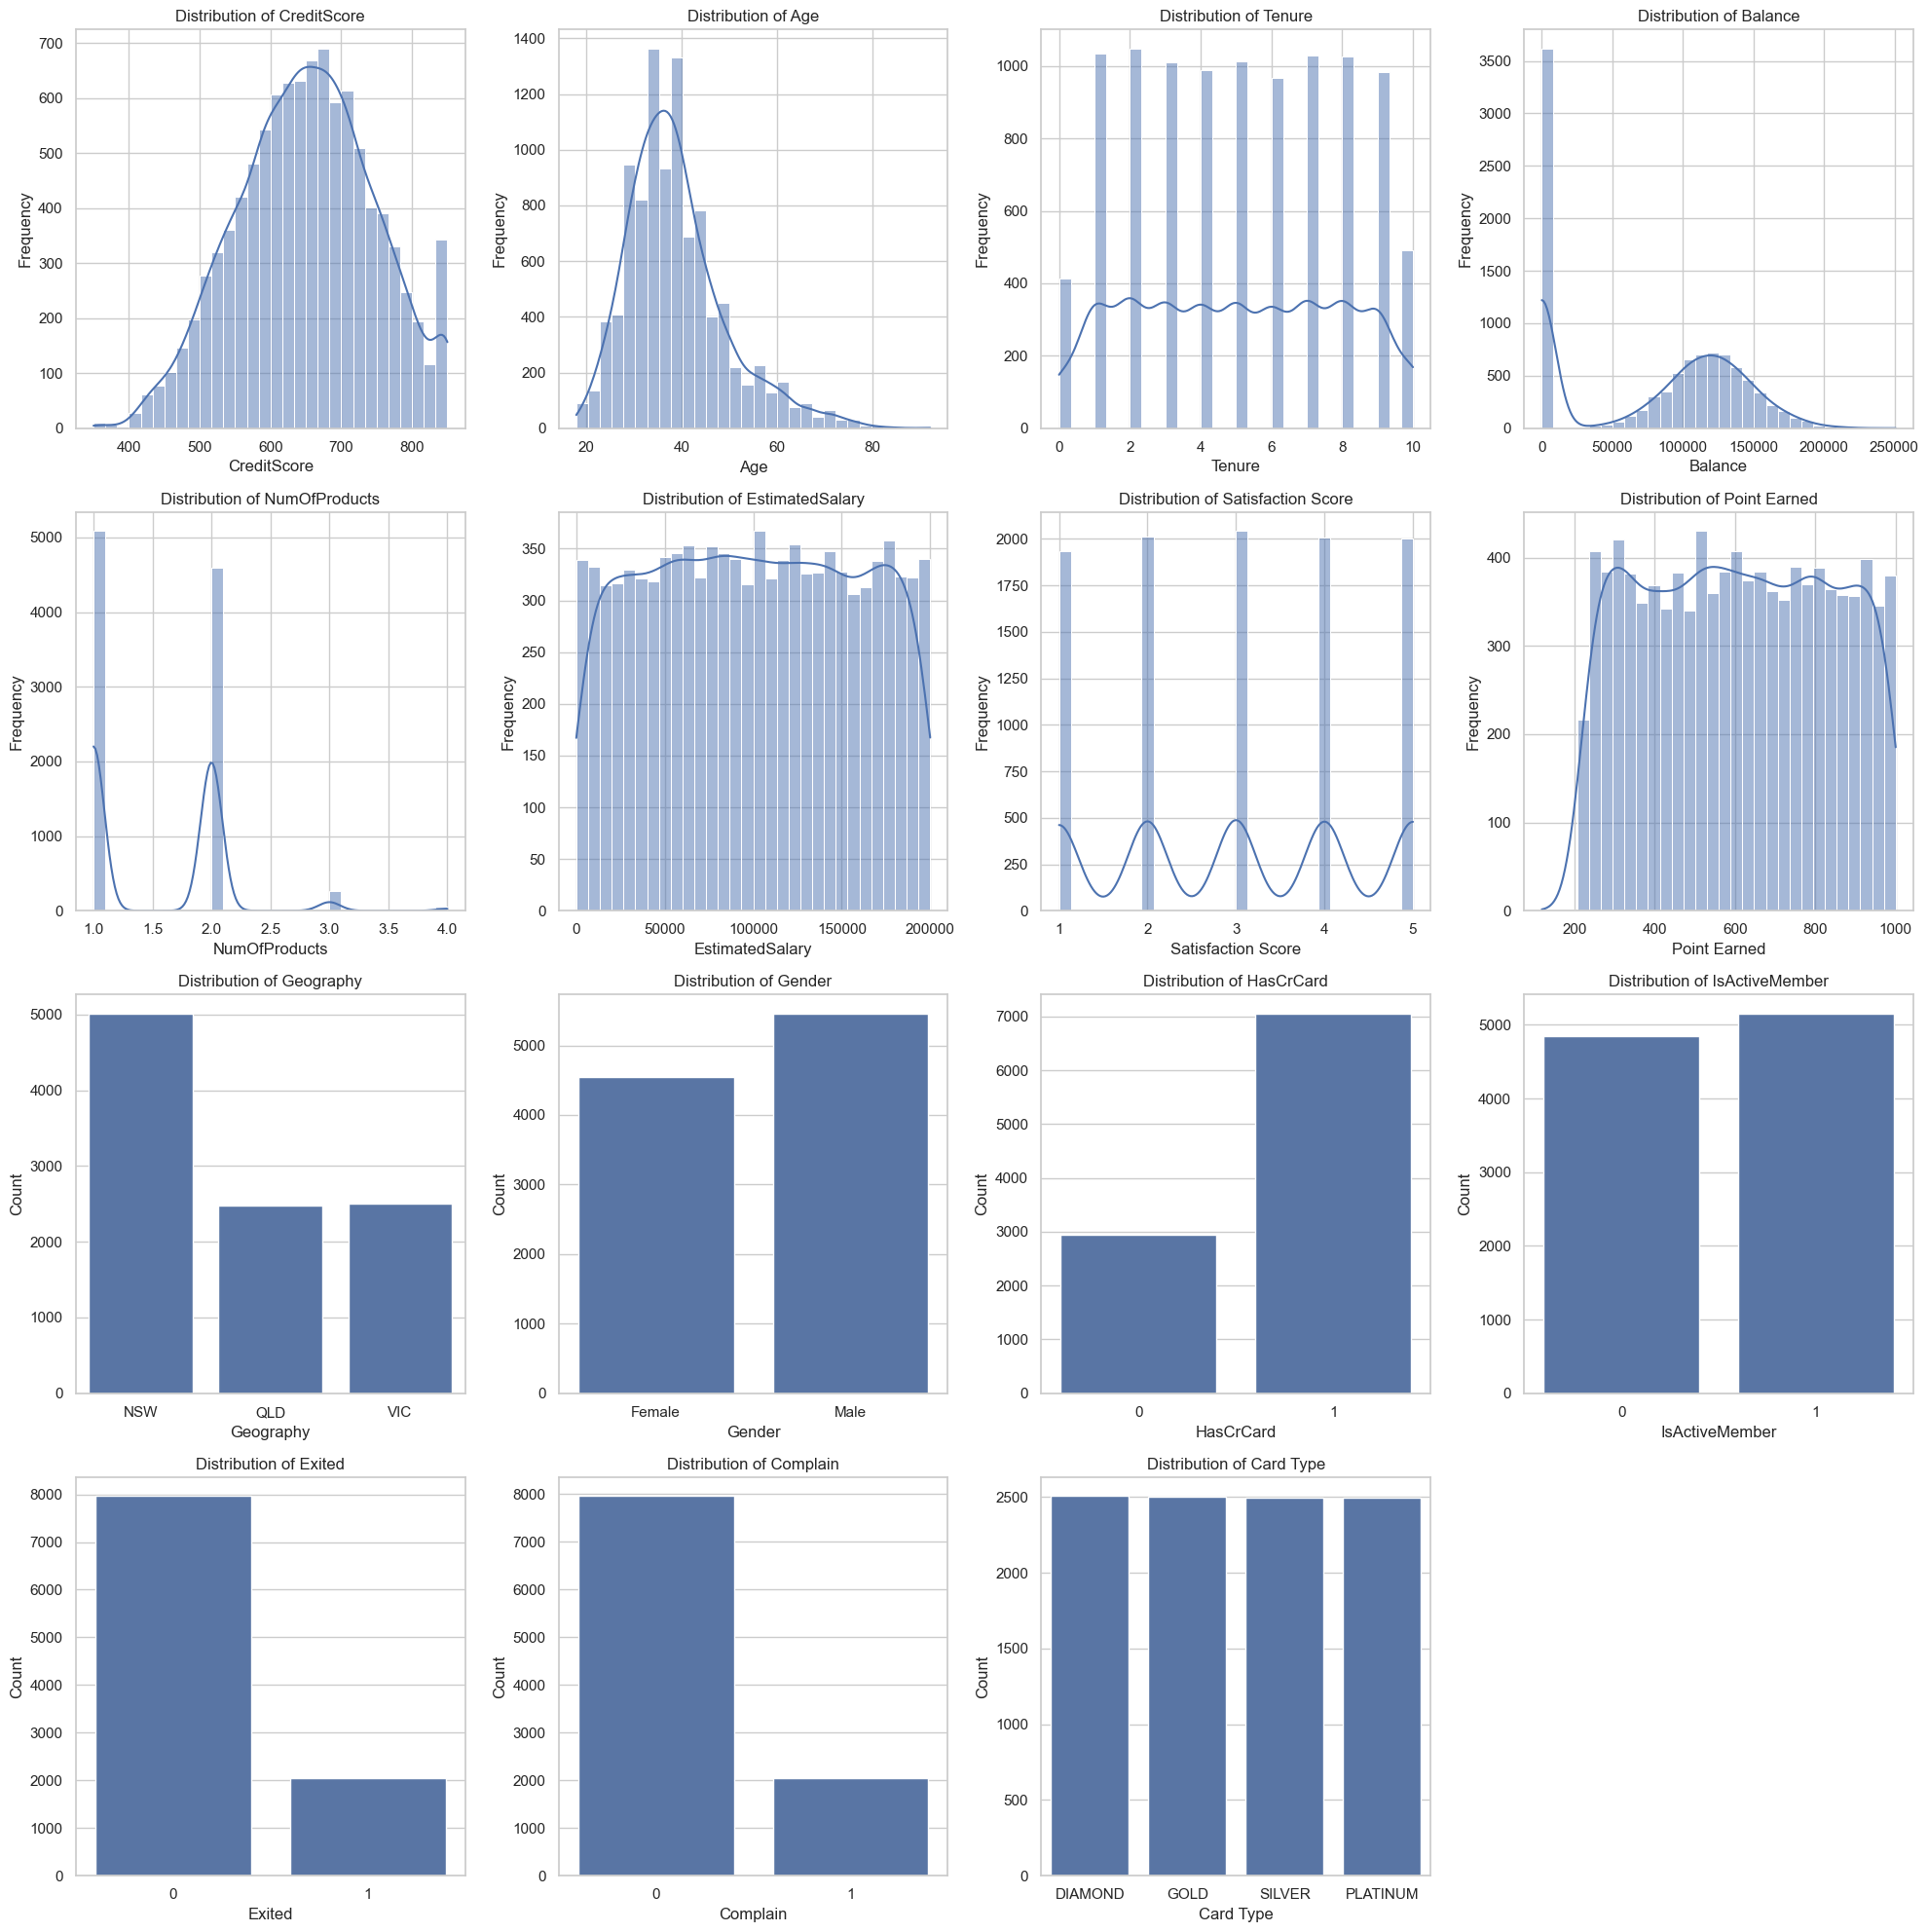

In [22]:
# # Part 2:
# distribution graphs

# List of numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Exited', 'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 4
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the plotting style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency' if col in numerical_columns else 'Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

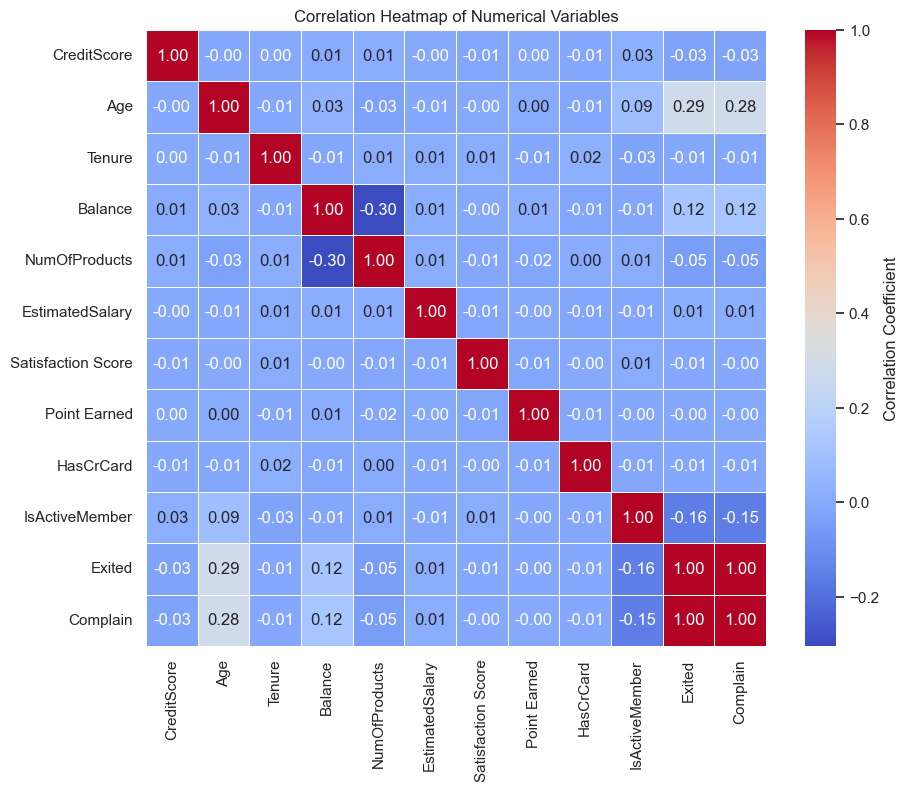

In [24]:
# Part 2: create heatmap and correlation chart 

# List of shortlisted columns
shortlist_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score','Point Earned',
                    #  add category columns below
                     'HasCrCard', 'IsActiveMember', 'Exited', 'Complain']




# Calculate the correlation matrix
correlation_matrix = df[shortlist_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


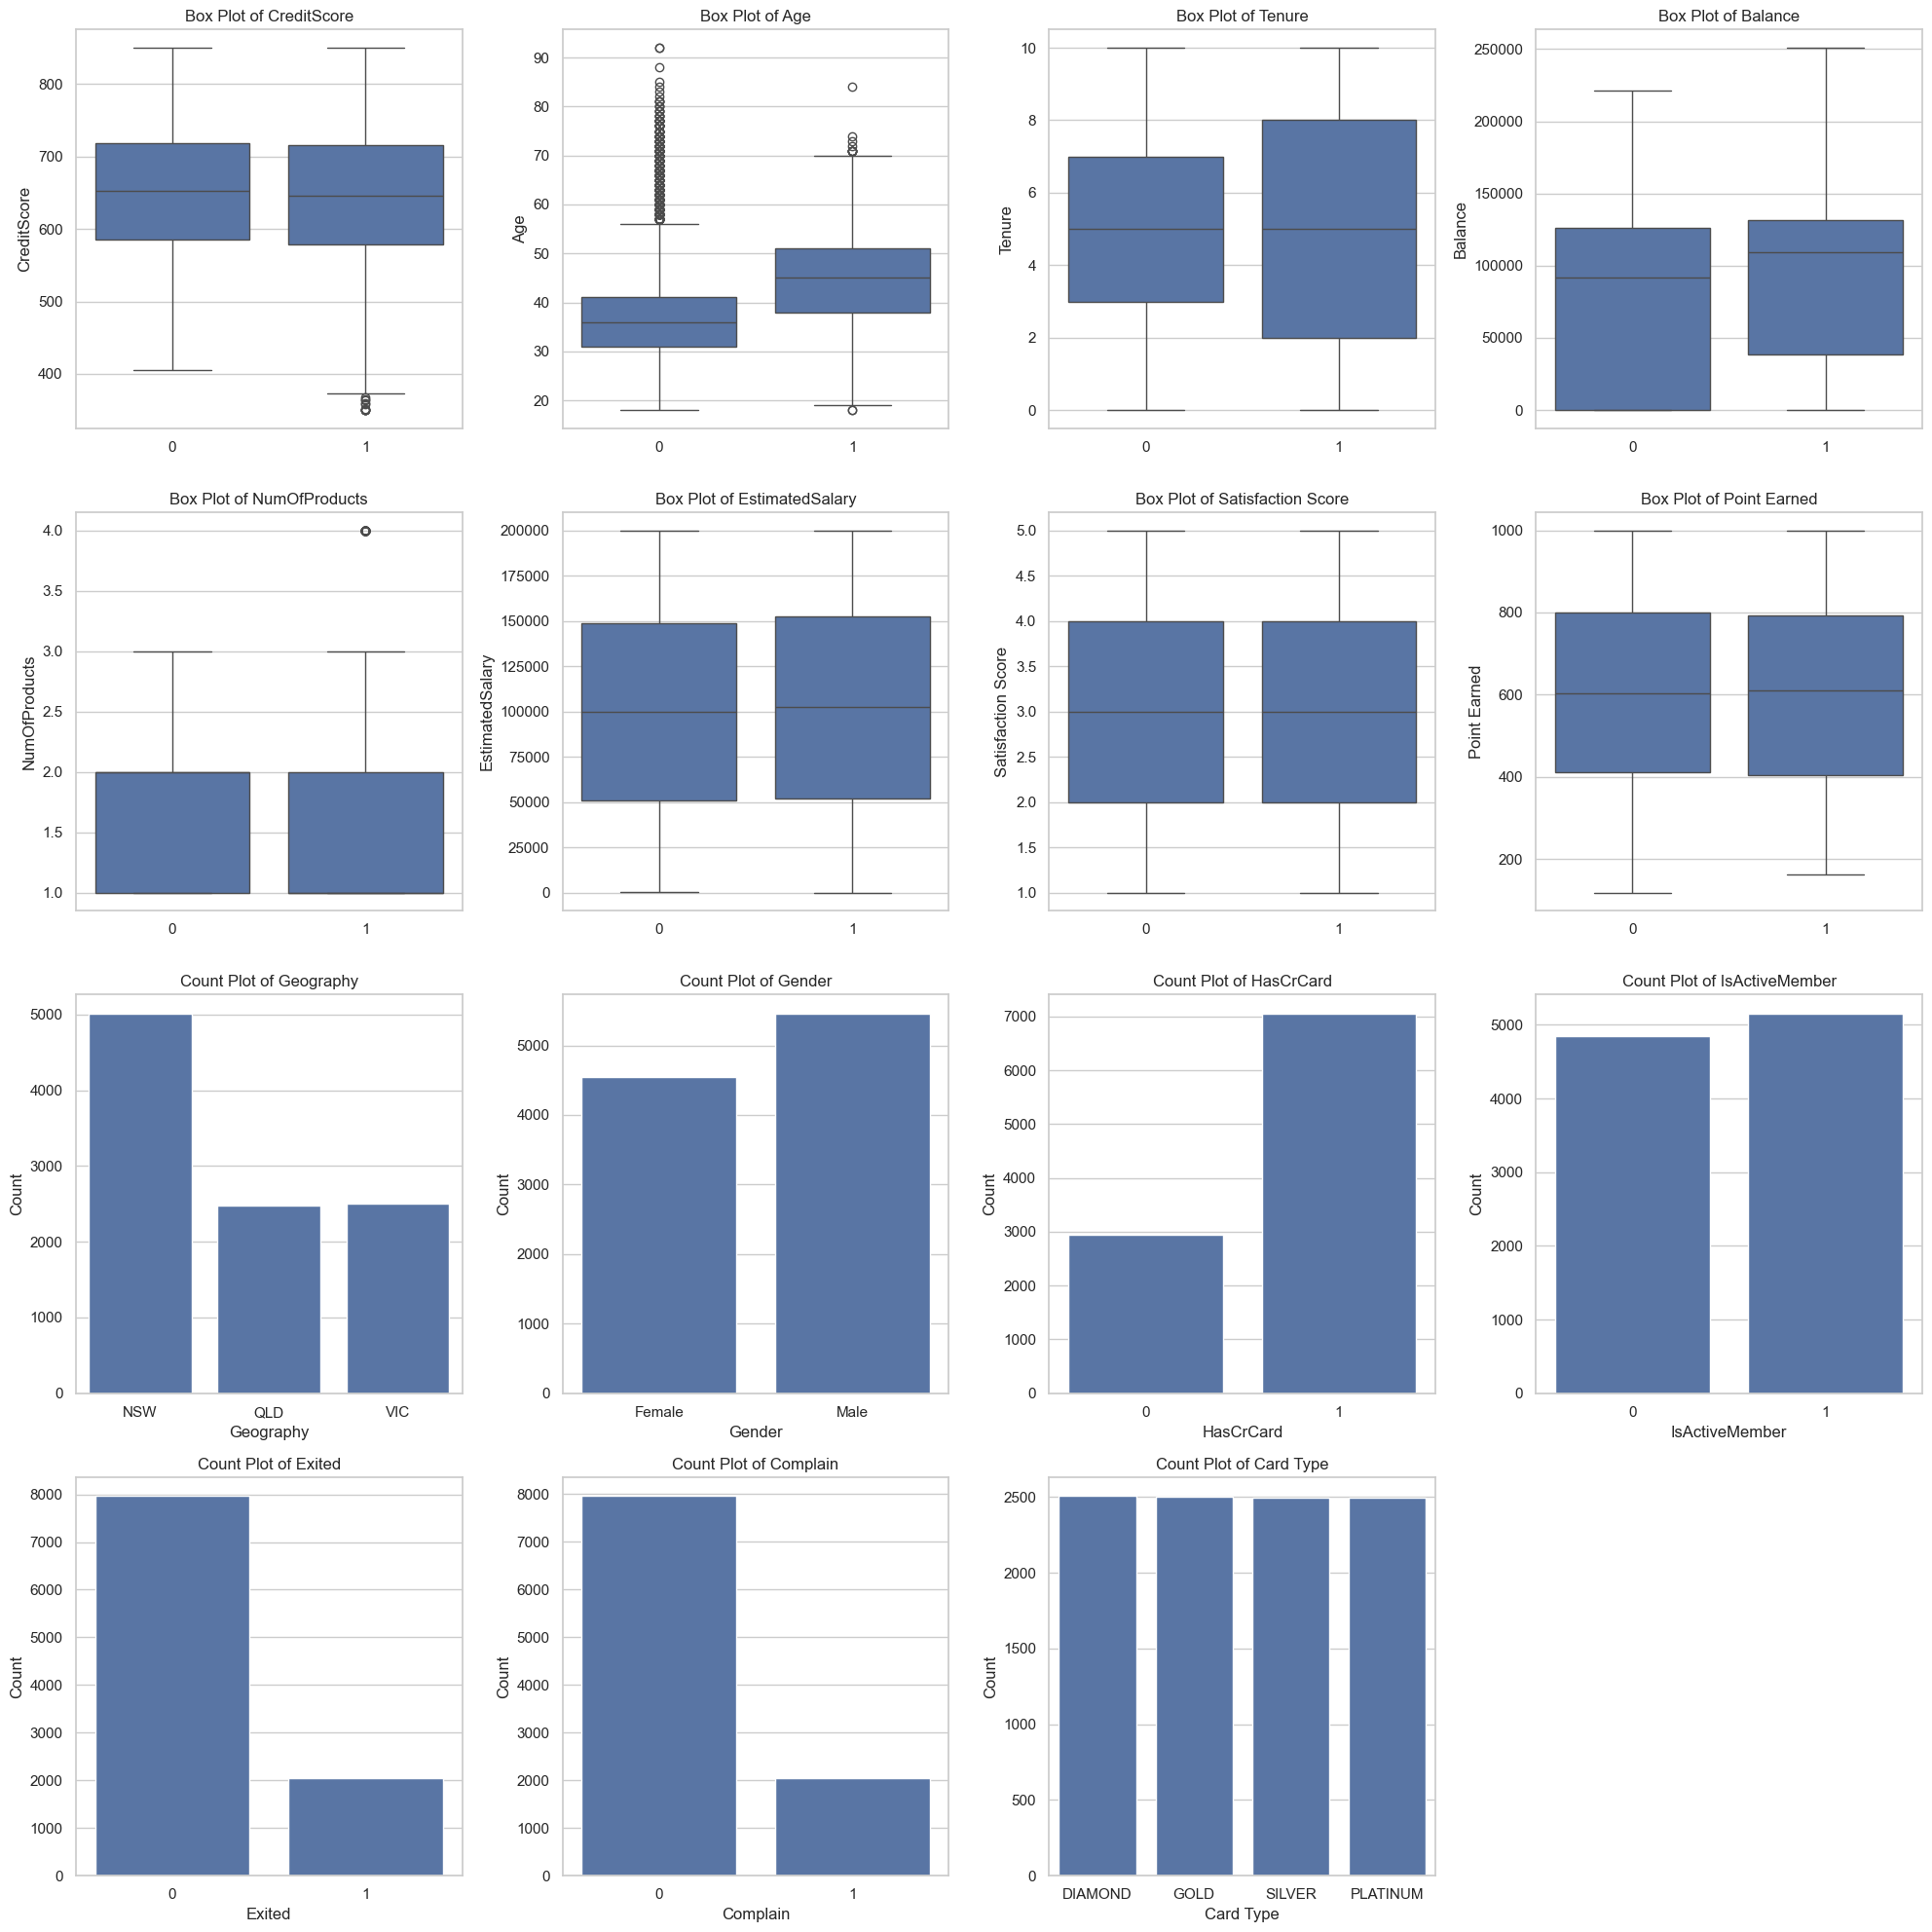

In [25]:
# Part 2: box plots

# List of numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Exited', 'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 4
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

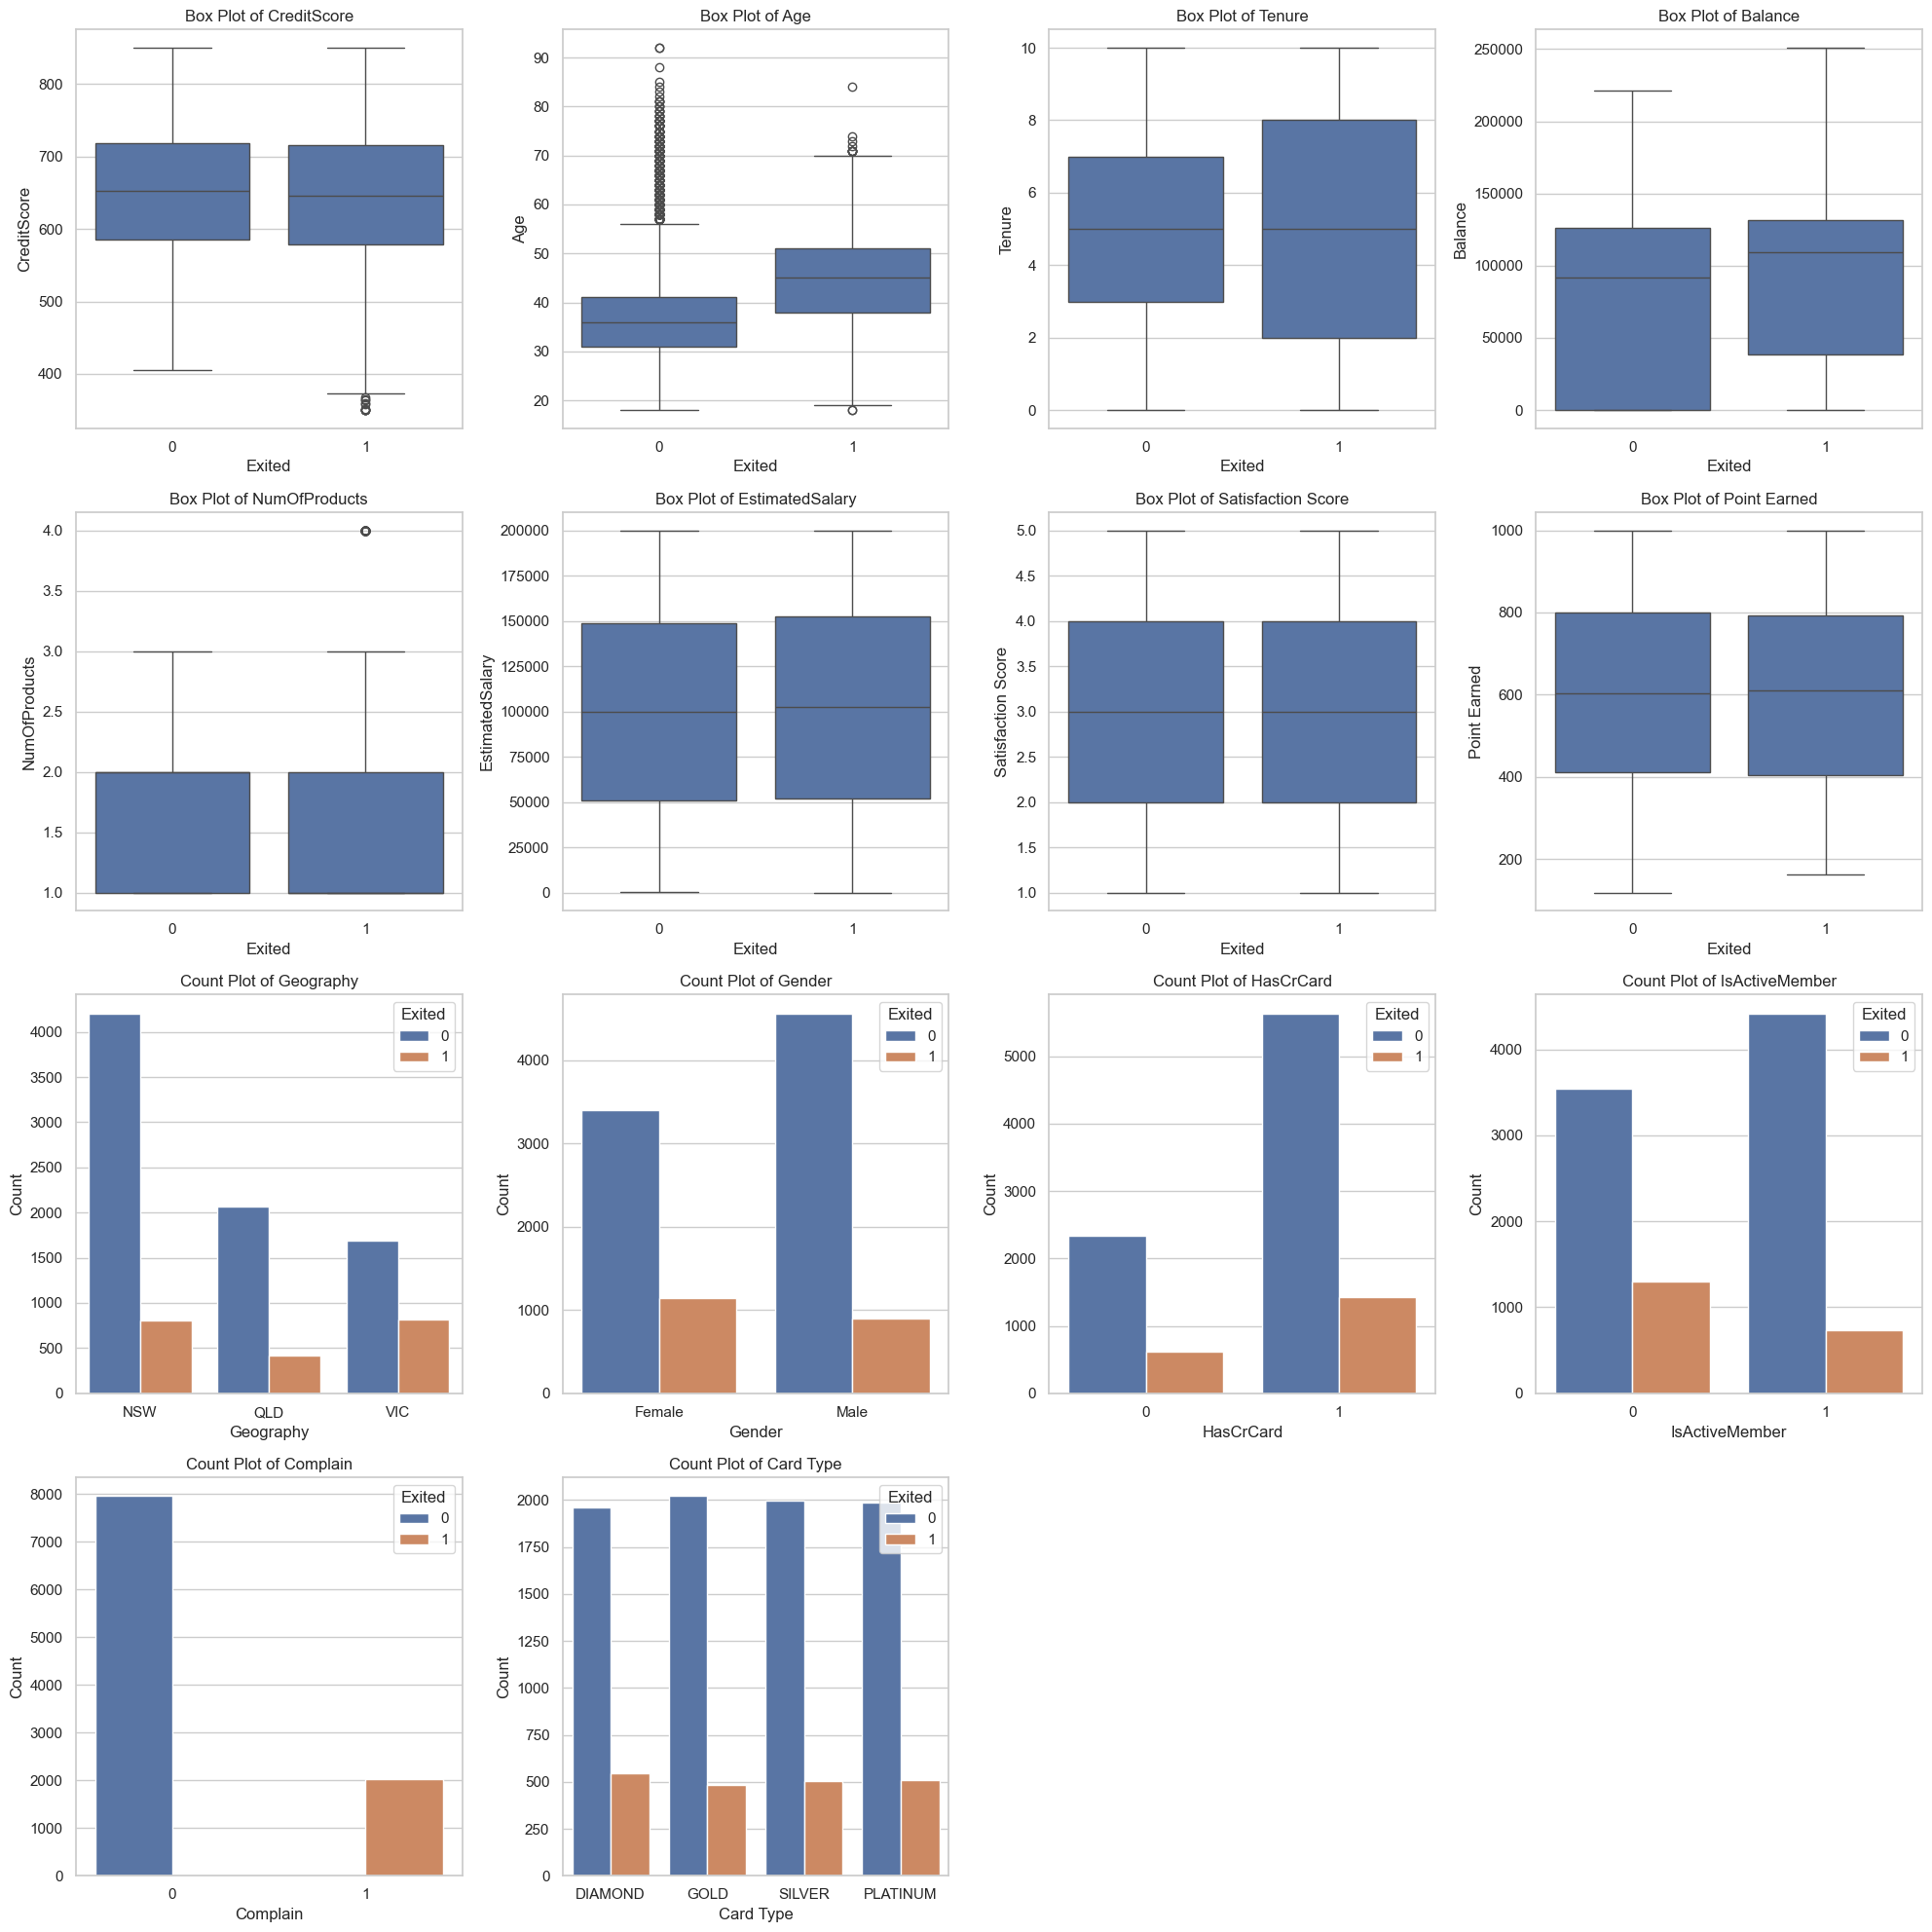

In [27]:
# List of numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 4
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('Exited')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Part 2
# Now that you have access to the dataset, it’s time to start understanding the statistical properties of the data. 
# These activities will all be carried out in Ed Lessons.
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 
# Recognise common distributions in the data, such as Gaussian, binomial, Poisson, etc. 
# Plan what visualisations you will include in your report and describe how you will explore and visualise the data.

# visuals done, need to wrap up

In [ ]:
# Part 3
# Generating relevant charts to visualise the distributions of different attributes will be your starting point for this part. 
# Generate histograms, box plots and other relevant charts to visualise data distributions
# Generate a correlation matrix to understand the relationships between different attributes. 
# Identify and address any data quality issues in the dataset. 


# Select a random sample from the dataset and apply bootstrapping techniques.


In [43]:

# List of categorical columns to be one-hot encoded
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Complain', 'Card Type']

df_encoded[boolean_columns] = df[categorical_columns].astype(int)

# Apply one-hot encoding to categorical columns and create a new DataFrame df_v2
df_v2 = pd.get_dummies(df_encoded, columns=boolean_columns, drop_first=False)




# Display the first few rows of the new DataFrame to check the encoding
print(df_v2.head(30))







# # Calculate the correlation matrix
# correlation_matrix = df_v2.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Draw the heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
#             cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5)

# # Set title and show the plot
# plt.title('Correlation Heatmap of Numerical Variables')
# plt.show()

ValueError: invalid literal for int() with base 10: 'NSW'

In [29]:
# Part 4
# For this final part, formulate hypotheses related to customer churn. For example, ‘customers with a lower balance are more likely to churn.’ 
# Apply statistical significance tests to evaluate these hypotheses, interpret the results of your statistical tests and draw valid conclusions. This will help you gain an understanding of the principles of experimental design.
# Create a plan for a controlled experiment to test one of your hypotheses. Include the experiment design in your PowerPoint report.
# Write a conclusion for your report and include it in the PowerPoint.



